In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
)

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
data = pd.read_csv("/content/drive/My Drive/WEEK2AI/FinalAi/GlobalWeather.csv")

In [4]:
data.dtypes

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49501 entries, 0 to 49500
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       49501 non-null  object 
 1   location_name                 49501 non-null  object 
 2   latitude                      49501 non-null  float64
 3   longitude                     49501 non-null  float64
 4   timezone                      49501 non-null  object 
 5   last_updated_epoch            49501 non-null  int64  
 6   last_updated                  49501 non-null  object 
 7   temperature_celsius           49501 non-null  float64
 8   temperature_fahrenheit        49501 non-null  float64
 9   condition_text                49501 non-null  object 
 10  wind_mph                      49501 non-null  float64
 11  wind_kph                      49501 non-null  float64
 12  wind_degree                   49501 non-null  int64  
 13  w

In [6]:
data.dtypes

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


In [7]:
data.shape

(49501, 41)

In [8]:
data.describe()

latitude     longitude  last_updated_epoch  temperature_celsius  \
count  49501.000000  49501.000000        4.950100e+04         49501.000000   
mean      19.140966     22.204052        1.726879e+09            22.963972   
std       24.480948     65.790750        6.411428e+06             9.207223   
min      -41.300000   -175.200000        1.715849e+09           -24.800000   
25%        3.750000     -6.250000        1.721220e+09            18.200000   
50%       17.250000     23.320000        1.726916e+09            25.300000   
75%       40.400000     50.580000        1.732437e+09            29.000000   
max       64.150000    179.220000        1.737887e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            49501.000000  49501.000000  49501.000000  49501.000000   
mean                73.336609      8.284489     13.336619    170.876104   
std                 16.572897      9.830255     15.818984    103.163971   
min                -12.600000      2.200000      3.600000      1.000000   
25%                 64.800000      4.000000      6.500000     82.000000   
50%                 77.500000      6.900000     11.200000    164.000000   
75%                 84.200000     11.600000     18.700000    258.000000   
max                120.600000   1841.200000   2963.200000    360.000000   

        pressure_mb   pressure_in  ...      gust_kph  \
count  49501.000000  49501.000000  ...  49501.000000   
mean    1013.762429     29.935799  ...     19.274574   
std        7.067456      0.208597  ...     17.525583   
min      971.000000     28.670000  ...      3.600000   
25%     1010.000000     29.830000  ...     10.800000   
50%     1013.000000     29.910000  ...     17.000000   
75%     1017.000000     30.030000  ...     25.700000   
max     1080.000000     31.890000  ...   2970.400000   

       air_quality_Carbon_Monoxide  air_quality_Ozone  \
count                 49501.000000       49501.000000   
mean                    518.095094          62.797481   
std                     991.118389          37.697226   
min                   -9999.000000           0.000000   
25%                     220.300000          37.000000   
50%                     310.800000          59.000000   
75%                     480.700000          83.000000   
max                   38879.398000         480.700000   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
count                  49501.000000                 49501.000000   
mean                      14.149308                    10.717643   
std                       25.865444                    51.782360   
min                        0.000000                 -9999.000000   
25%                        0.900000                     0.700000   
50%                        2.960000                     2.100000   
75%                       14.430000                     7.955000   
max                      427.700000                   521.330000   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
count       49501.000000      49501.000000              49501.000000   
mean           23.702077         46.666473                  1.656492   
std            45.740677        141.741469                  0.963904   
min             0.185000          0.185000                  1.000000   
25%             4.800000          7.770000                  1.000000   
50%            12.025000         18.870000                  1.000000   
75%            26.600000         42.500000                  2.000000   
max          1614.100000       5858.020000                  6.000000   

       air_quality_gb-defra-index  moon_illumination  
count                49501.000000       49501.000000  
mean                     2.527828          49.418254  
std                      2.482158          34.793533  
min                      1.000000           0.000000  
25%                      1.000000          15.000000  
50%                  

In [9]:
data.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

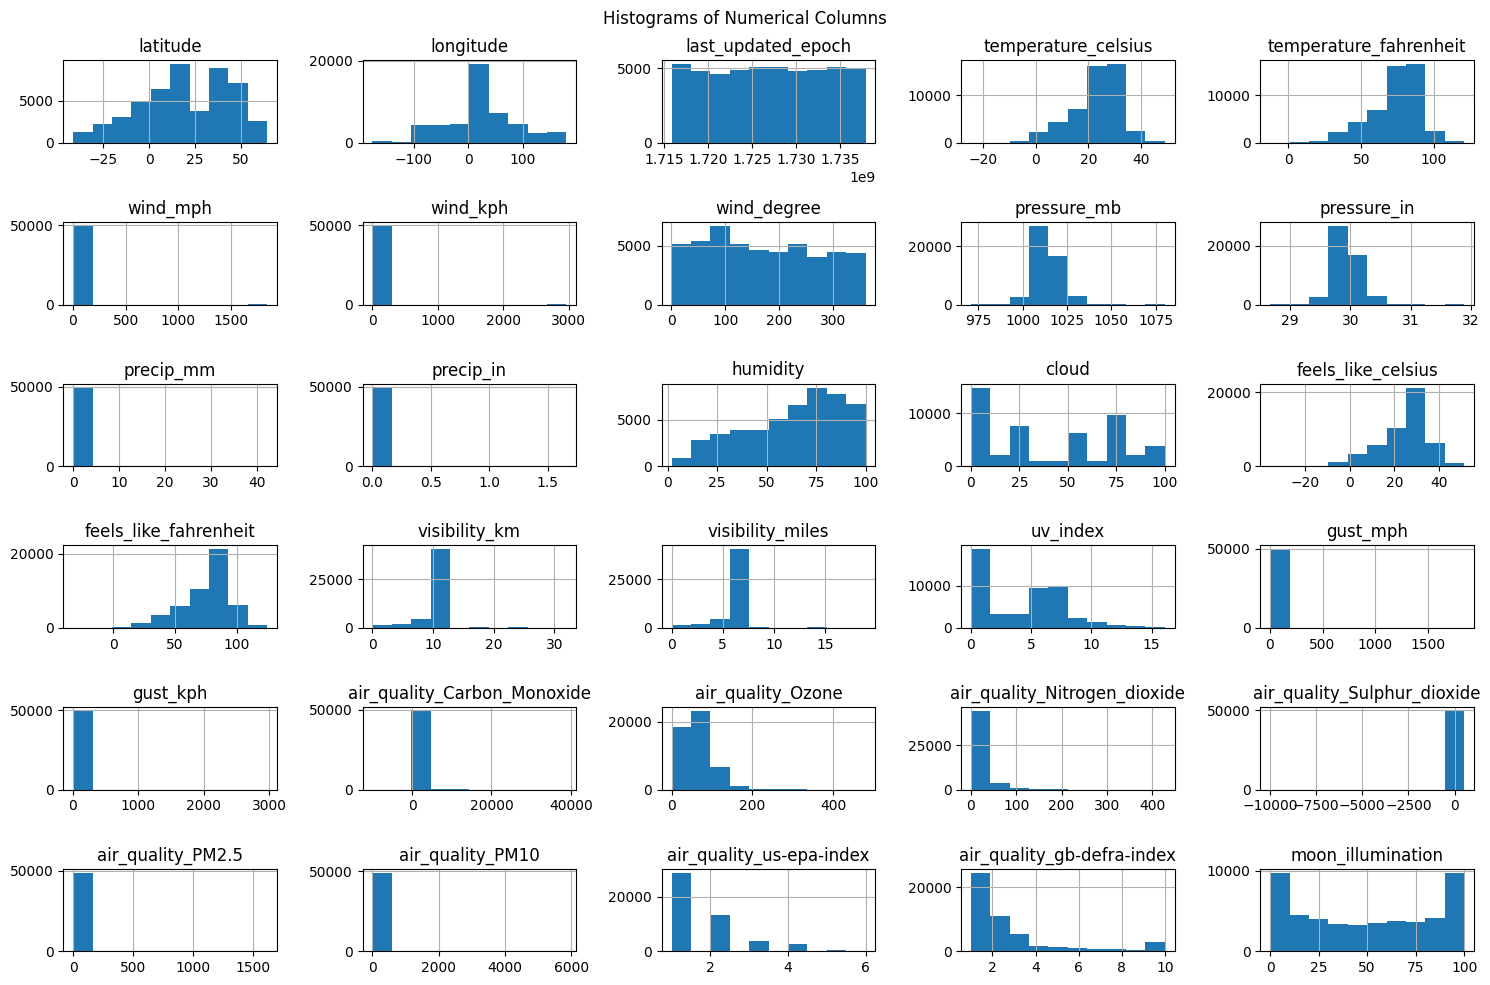

In [10]:
# Histogram for numerical columns
data.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.tight_layout()
plt.show()

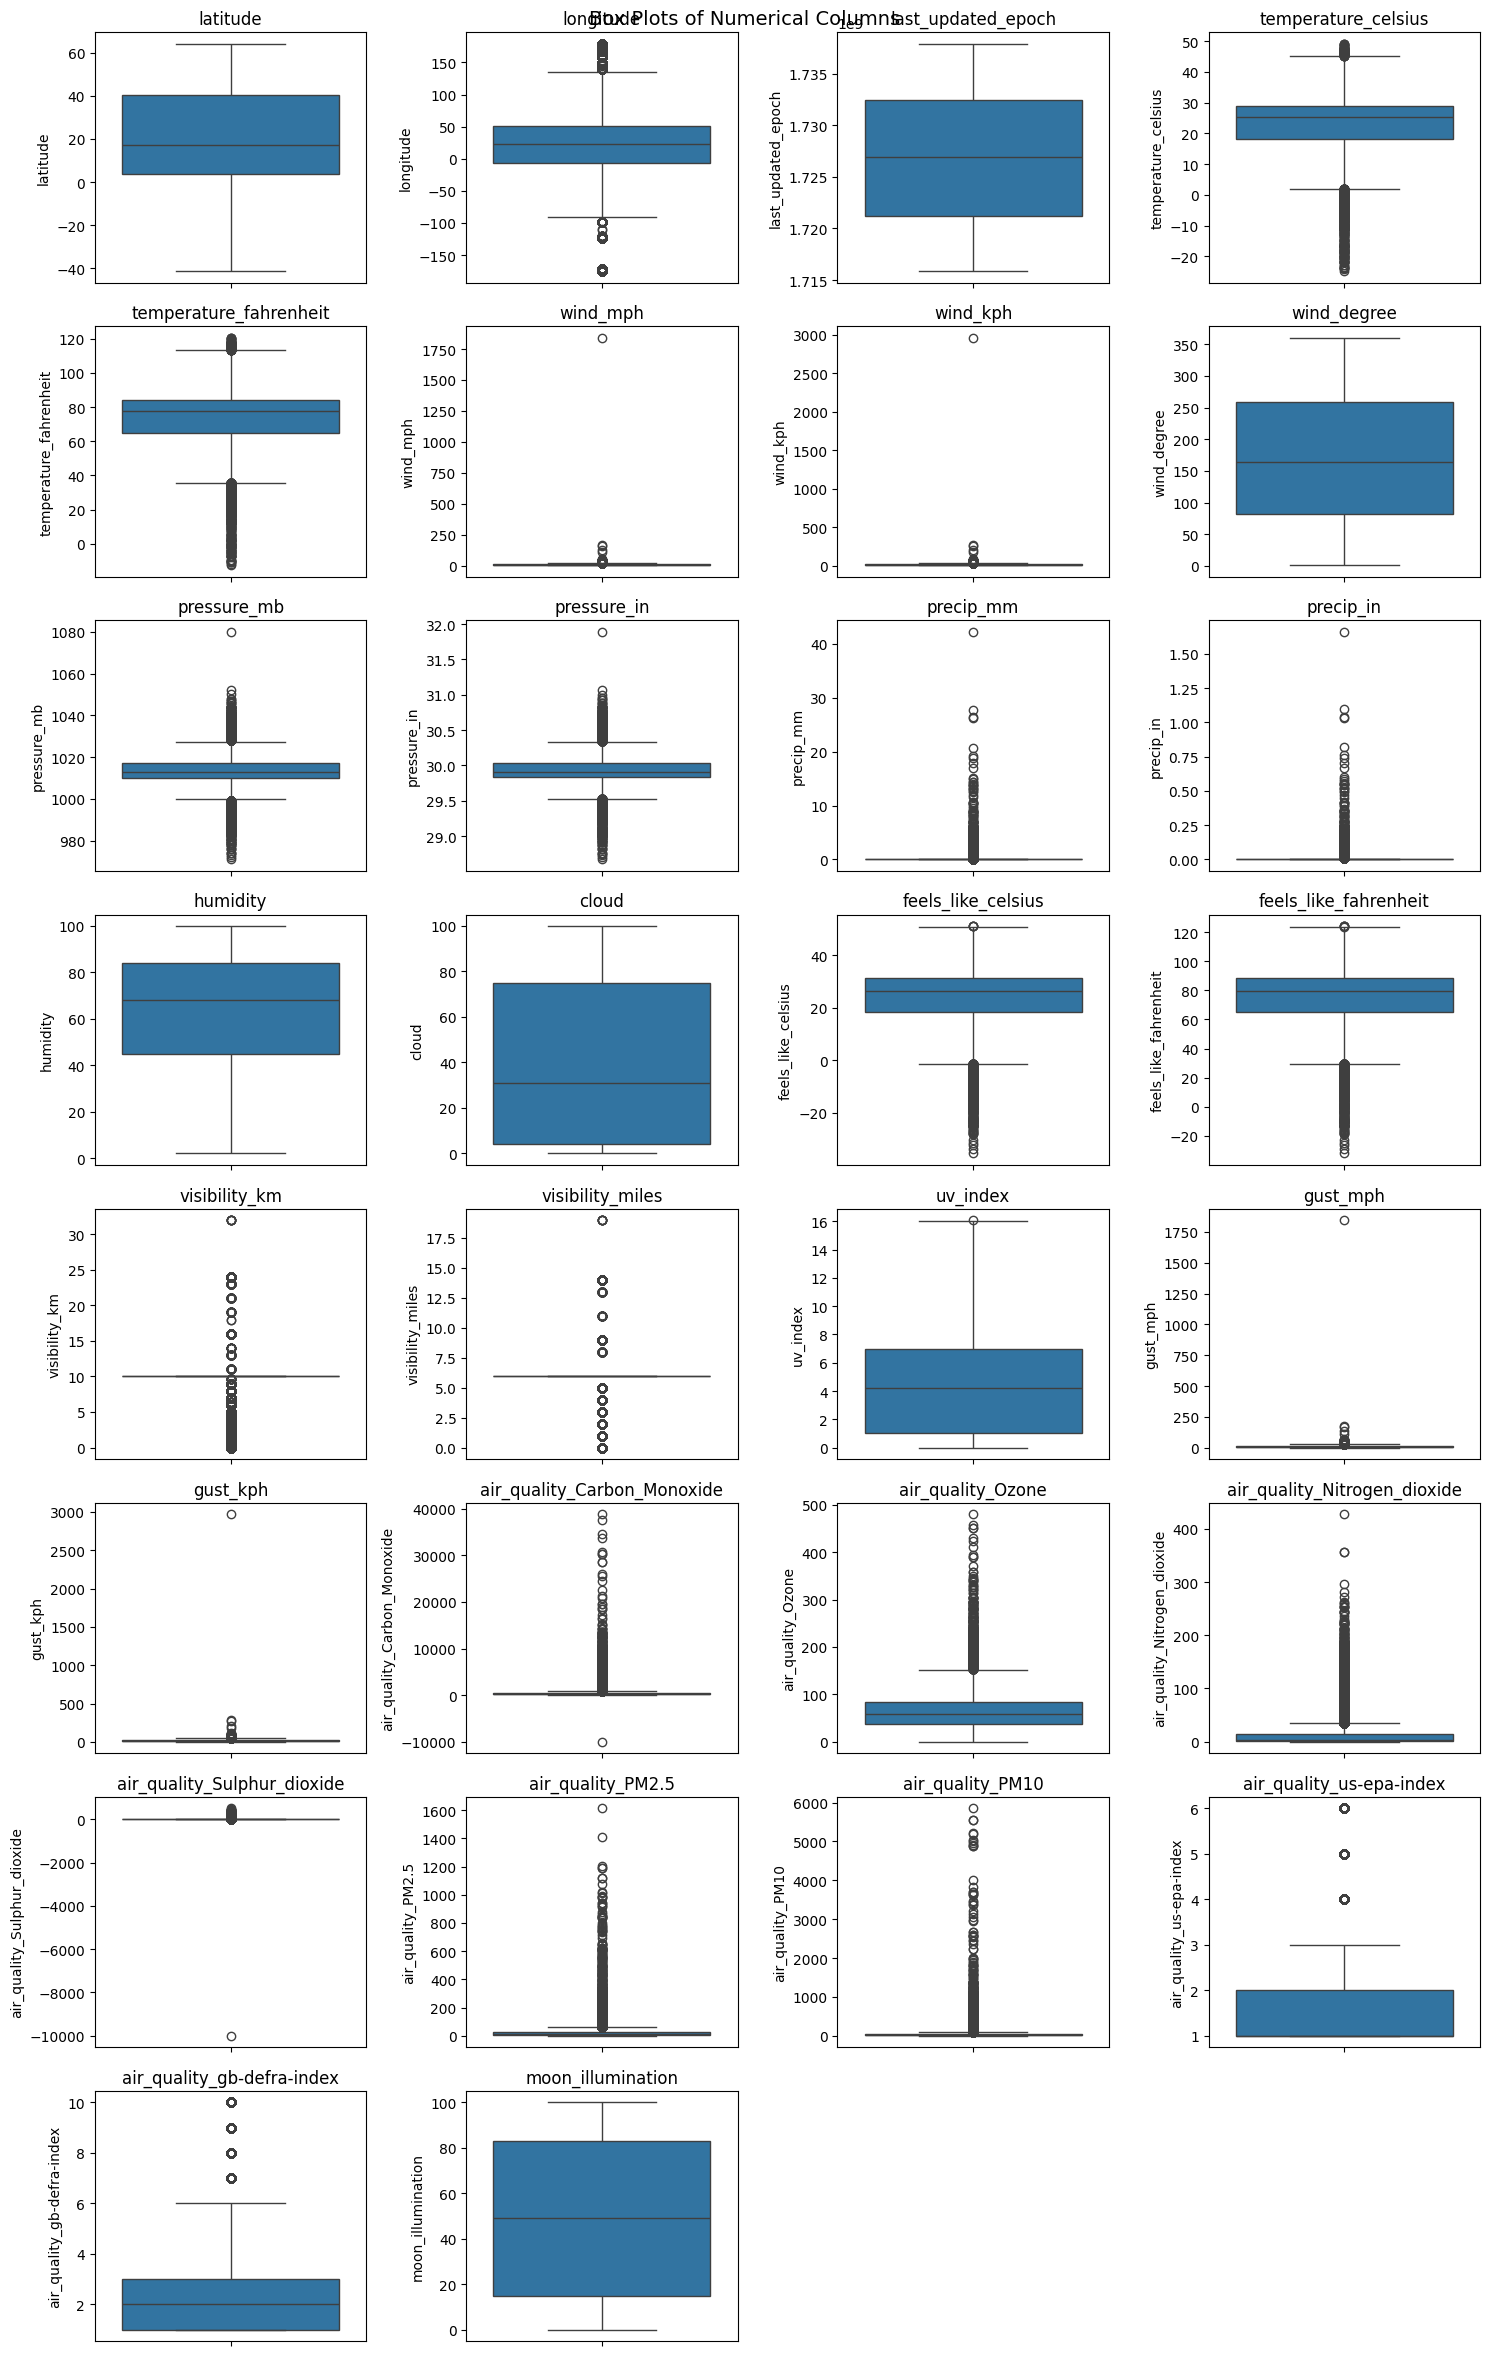

In [11]:
num_cols = data.select_dtypes(include=['number']).columns  # Get numerical columns
n = len(num_cols)  # Count of numerical columns
rows = (n // 4) + (n % 4 > 0)  # Calculate rows, 4 plots per row
plt.figure(figsize=(15, rows * 3))  # Adjust figure size
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 4, i)  # Create subplots in a grid
    sns.boxplot(y=data[col])  # Boxplot for each column
    plt.title(col)  # Set title
plt.suptitle('Box Plots of Numerical Columns', fontsize=14)
plt.tight_layout()
plt.show()

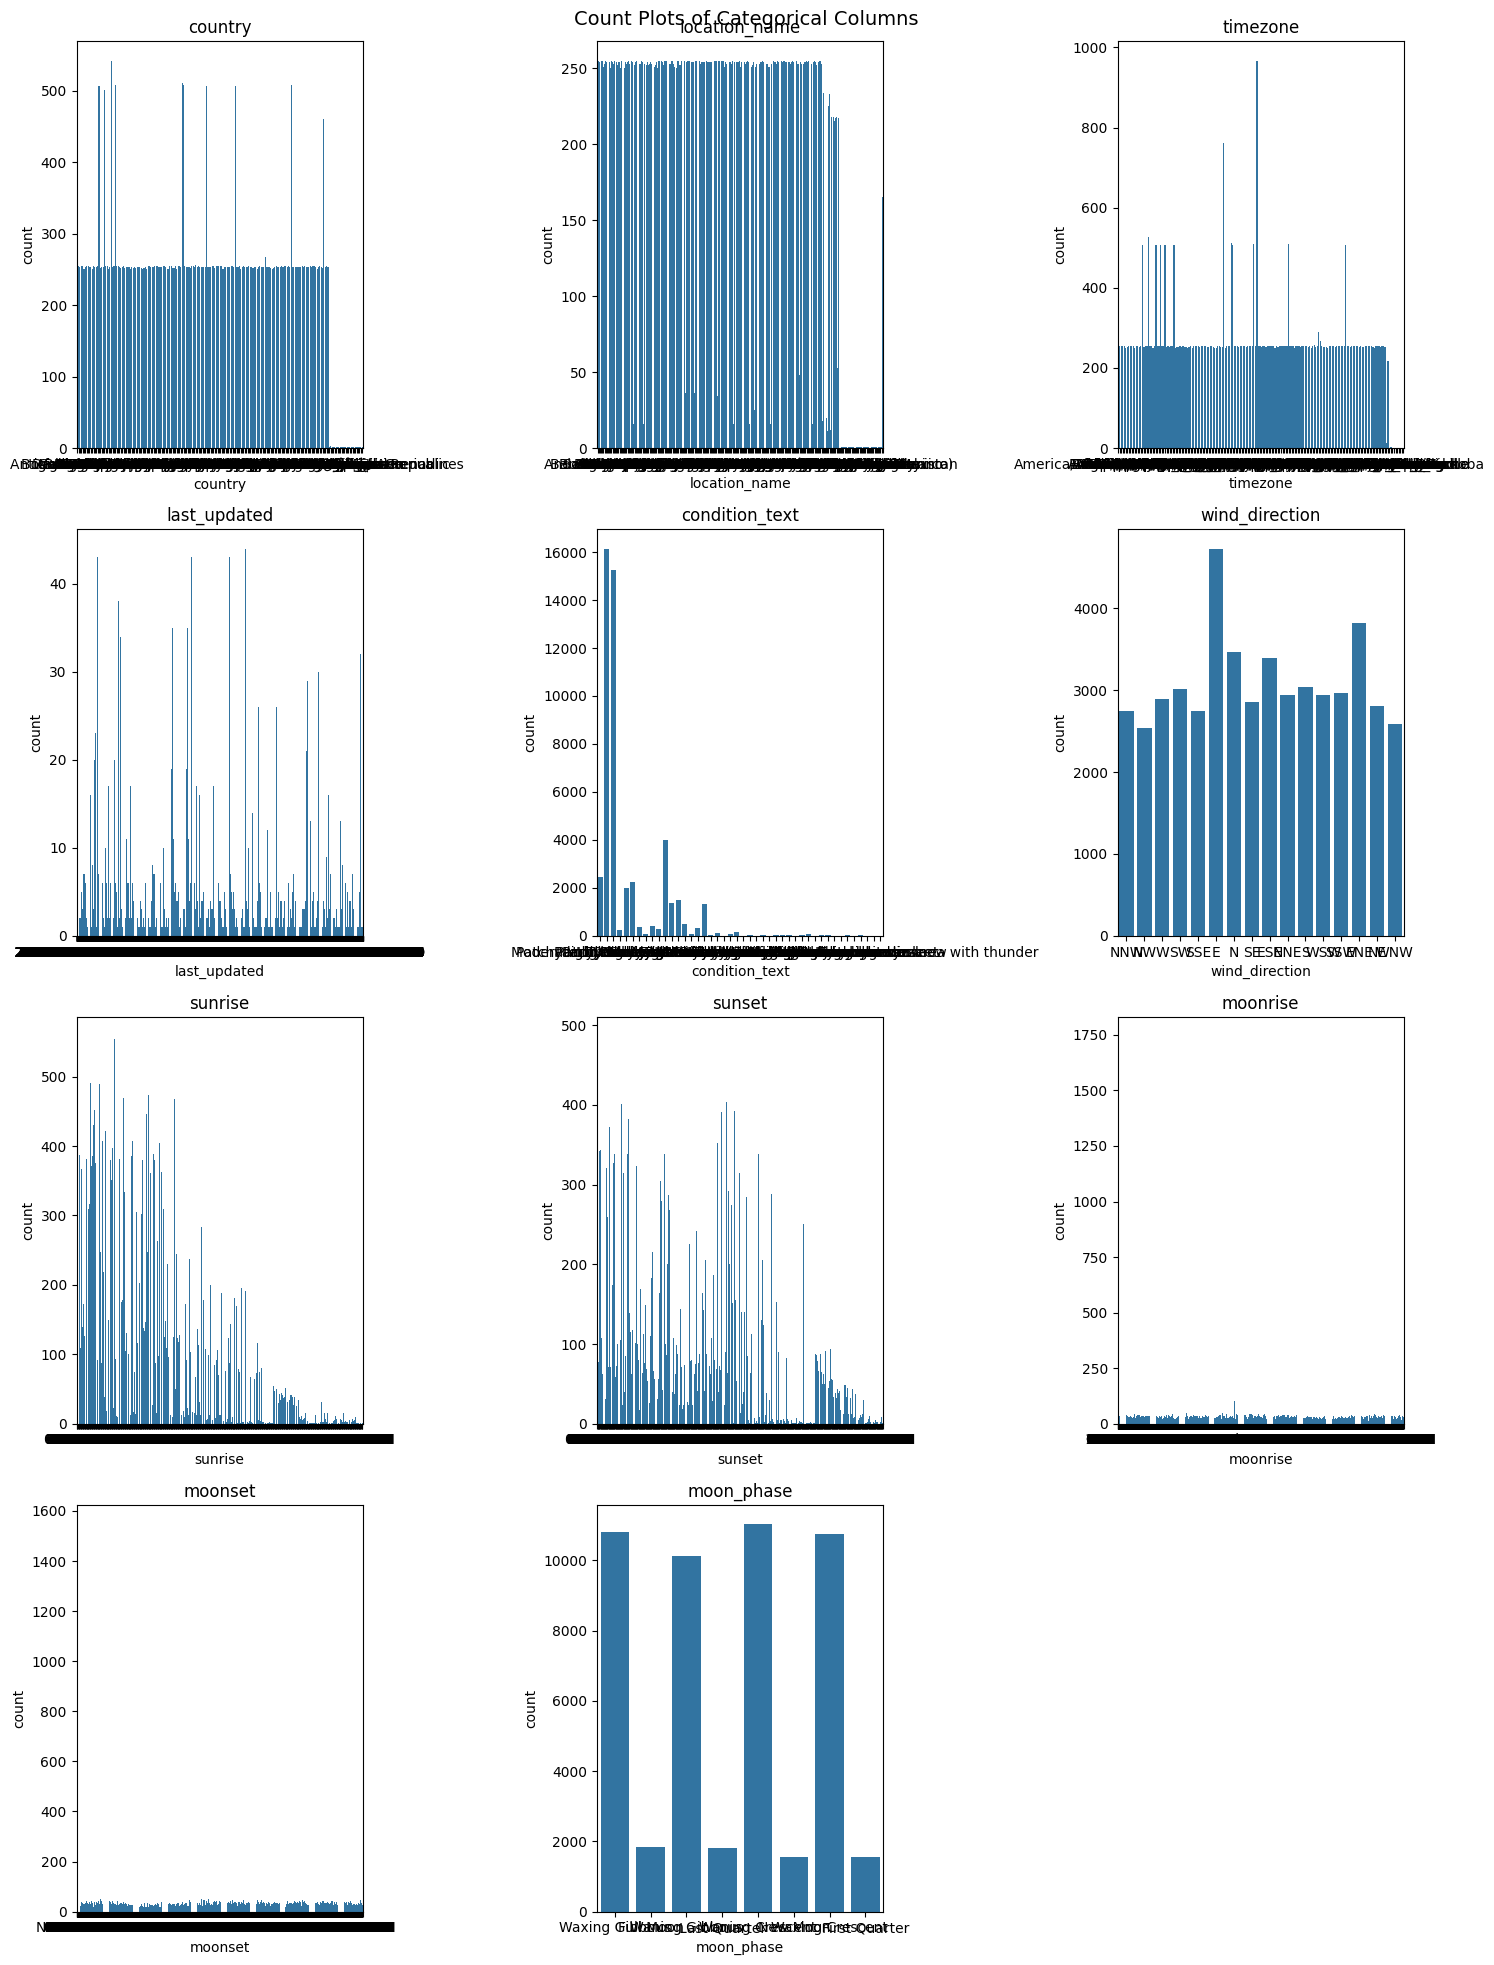

In [18]:

# The program will ignore UserWarnings and continue.

# Get categorical columns
cat_cols = data.select_dtypes(include=['object']).columns

# Set up the grid layout
rows = (len(cat_cols) + 2) // 3
cols = min(3, len(cat_cols))

plt.figure(figsize=(15, 5 * rows))

# Loop through columns and create count plots
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=data[col])
    plt.title(col)

plt.suptitle('Count Plots of Categorical Columns', fontsize=14)
plt.tight_layout()
plt.show()

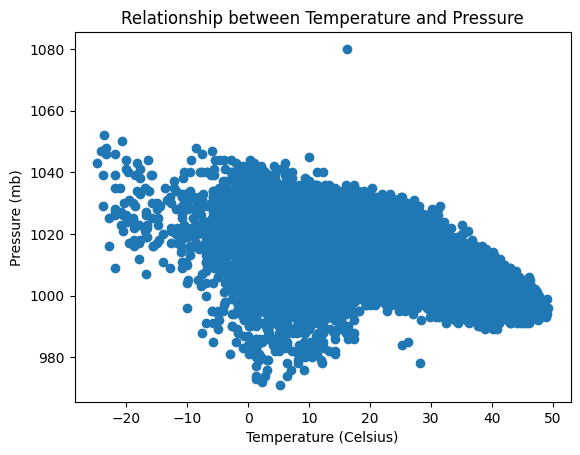

In [19]:
plt.scatter(data["temperature_celsius"], data["pressure_mb"])
plt.title("Relationship between Temperature and Pressure")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Pressure (mb)")
plt.show()

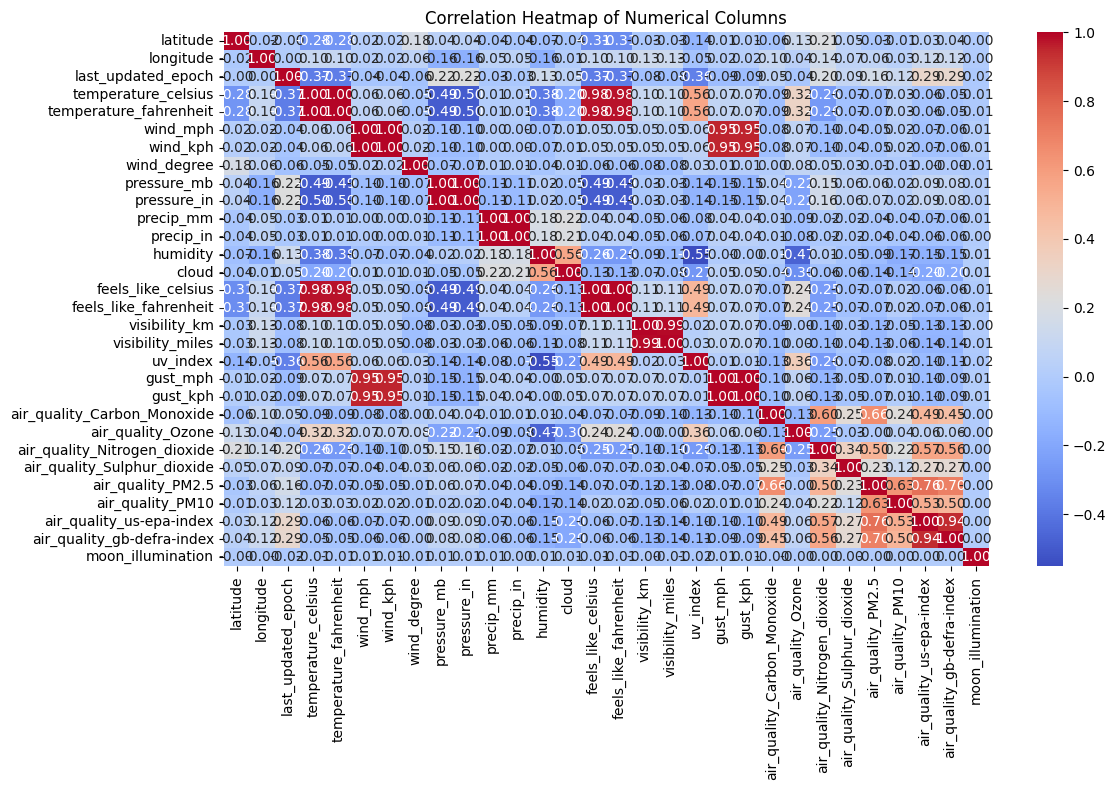

In [20]:
# Filter numerical columns for correlation heatmap
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for numerical columns
corr_matrix = data[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.show()


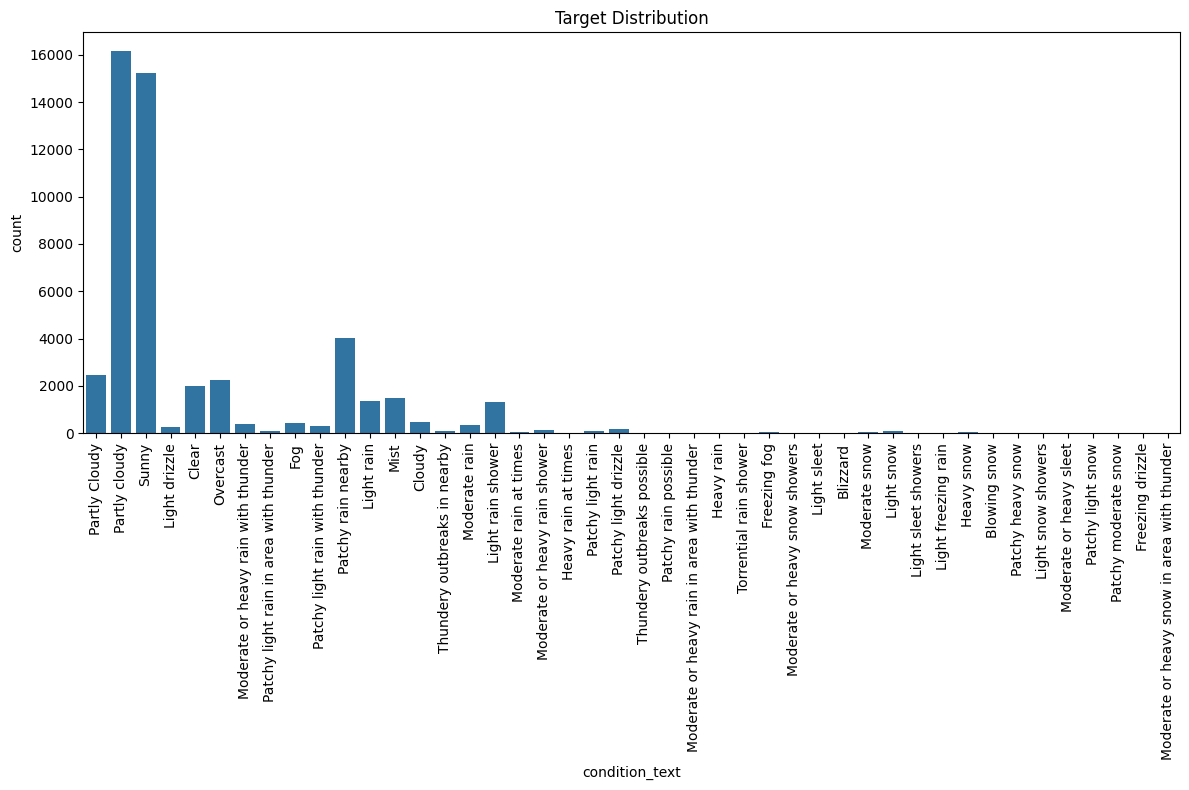

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(x="condition_text", data=data)
plt.title("Target Distribution")
plt.xticks(rotation=90)  # Rotate labels by 45 degrees
plt.tight_layout()
plt.show()


In [ ]:
class LogisticRegressionScratch:
    """
    A simple logistic regression model implemented from scratch.
    Supports binary and multi-class classification.
    """

    def __init__(self, learning_rate=0.01, epochs=1000, multi_class=False):
        """
        Initialize the logistic regression model.
        
        :param learning_rate: Step size for updating weights.
        :param epochs: Number of iterations for training.
        :param multi_class: Whether to use multi-class classification (Softmax).
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.multi_class = multi_class
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """
        Compute the sigmoid activation function (for binary classification).
        """
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        """
        Compute the softmax function (for multi-class classification).
        """
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Prevent overflow
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.
        
        :param X: Feature matrix.
        :param y: Target labels.
        """
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        if self.multi_class:
            self.weights = np.zeros((n_features, n_classes))  # Multi-class weights
            self.bias = np.zeros((1, n_classes))  # Multi-class bias
            y_one_hot = np.eye(n_classes)[y]  # Convert labels to one-hot encoding
        else:
            self.weights = np.zeros(n_features)  # Binary weights
            self.bias = 0  # Binary bias

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            if self.multi_class:
                probabilities = self.softmax(linear_model)  # Multi-class probabilities
                gradients_w = np.dot(X.T, (probabilities - y_one_hot)) / n_samples
                gradients_b = np.sum(probabilities - y_one_hot, axis=0) / n_samples
            else:
                probabilities = self.sigmoid(linear_model)  # Binary probabilities
                gradients_w = np.dot(X.T, (probabilities - y)) / n_samples
                gradients_b = np.sum(probabilities - y) / n_samples

            self.weights -= self.learning_rate * gradients_w  # Update weights
            self.bias -= self.learning_rate * gradients_b  # Update bias

    def predict_proba(self, X):
        """
        Compute probability predictions for input data.
        
        :param X: Feature matrix.
        :return: Predicted probabilities.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self.softmax(linear_model) if self.multi_class else self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """
        Predict class labels for input data.
        
        :param X: Feature matrix.
        :param threshold: Decision threshold for binary classification.
        :return: Predicted class labels.
        """
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1) if self.multi_class else (probabilities >= threshold).astype(int)


In [23]:
label_encoder = LabelEncoder()
for col in ["country", "location_name", "timezone", "last_updated", "condition_text",
            "wind_direction", "sunrise", "sunset", "moonrise", "moonset", "moon_phase"]:
    data[col] = label_encoder.fit_transform(data[col])

# Prepare data
X = data.drop(["condition_text"], axis=1).values  # Ensure it's a NumPy array
y = data["condition_text"].values  # Convert to NumPy array



In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
lr_model = RandomForestClassifier(random_state=42)

In [27]:
lr_model = RandomForestClassifier(random_state=42)

In [28]:
lr_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


Evaluation Metrics for Training Set:
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-Score (macro): 1.0000
Confusion Matrix:
[[   1    0    0 ...    0    0    0]
 [   0   10    0 ...    0    0    0]
 [   0    0 1564 ...    0    0    0]
 ...
 [   0    0    0 ...   75    0    0]
 [   0    0    0 ...    0   10    0]
 [   0    0    0 ...    0    0    9]]



Evaluation Metrics for Test Set:
Accuracy: 0.8937
Precision (macro): 0.5566
Recall (macro): 0.3693
F1-Score (macro): 0.4022
Confusion Matrix:
[[  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 [  0   0 426 ...   0   0   0]
 ...
 [  0   0   0 ...   4   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


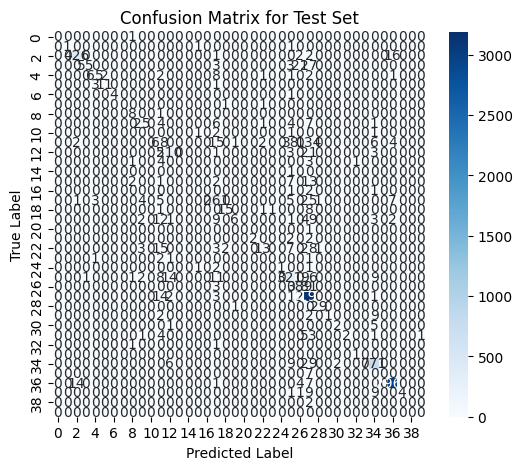

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, set_name):
    accuracy = accuracy_score(y_true, y_pred)

    # Check if it's binary or multi-class classification
    if len(set(y_true)) > 2:  # Multi-class case
        avg_method = 'macro'  # Options: 'micro', 'macro', 'weighted'
    else:  # Binary case
        avg_method = 'binary'

    precision = precision_score(y_true, y_pred, average=avg_method)
    recall = recall_score(y_true, y_pred, average=avg_method)
    f1 = f1_score(y_true, y_pred, average=avg_method)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"\nEvaluation Metrics for {set_name} Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision ({avg_method}): {precision:.4f}")
    print(f"Recall ({avg_method}): {recall:.4f}")
    print(f"F1-Score ({avg_method}): {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {set_name} Set")
    plt.show()
evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Test")



In [31]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)

In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)


In [ ]:
y_test_proba = svm_model.predict_proba(X_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Compute ROC Curve for Multi-Class (One-vs-Rest)
def plot_multi_class_roc(y_test, y_test_proba, num_classes):
    """
    Plot the ROC curve for a multi-class classification model using a one-vs-rest approach.

    :param y_test: True labels.
    :param y_test_proba: Predicted probabilities for each class.
    :param num_classes: Number of unique classes.
    """
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test == i, y_test_proba[:, i])  # Compute ROC curve
        auc_score = auc(fpr, tpr)  # Compute AUC score
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-Class ROC Curve (One-vs-Rest)")
    plt.legend()
    plt.show()

# Plot Confusion Matrix for Multi-Class
def plot_conf_matrix(y_true, y_pred, title):
    """
    Plot a confusion matrix for multi-class classification.

    :param y_true: True labels.
    :param y_pred: Predicted labels.
    :param title: Title of the confusion matrix plot.
    """
    conf_matrix = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=range(len(set(y_true))), 
                yticklabels=range(len(set(y_true))))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Example Usage (Replace with actual model outputs)
num_classes = len(set(y_test))  # Number of unique classes
plot_multi_class_roc(y_test, y_test_proba, num_classes)
plot_conf_matrix(y_test, y_test_pred, "Confusion Matrix for Softmax Classification")

# Evaluate Model Performance
evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Test")

# Compute predicted probabilities using an SVM model (replace with actual model)
y_test_proba = svm_model.predict_proba(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load your dataset (replace this part with your actual dataset)
# X = your_features
# y = your_target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replacing 'auto' with valid options
}

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model and evaluate it on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load your dataset (replace this part with your actual dataset)
# X = your_features
# y = your_target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define SVM model
svm = SVC(random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [3, 4, 5],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'coef0': [0, 0.1, 0.5],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'max_iter': [1000, -1]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model and evaluate it
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

# Load your large dataset (replace this part with your actual dataset)
# X = your_features
# y = your_target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)  # Use multiple cores for large data
rf.fit(X_train, y_train)

# Get feature importances and select features
sfm = SelectFromModel(rf, threshold=0.1)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train and evaluate with selected features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred = rf_selected.predict(X_test_selected)

# Print classification report
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

# Load your dataset (replace this part with your actual dataset)
# X = your_features
# y = your_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use OneVsRestClassifier for multiclass/multilabel classification
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Use SelectFromModel based on the model coefficients
selector = SelectFromModel(svm, threshold="mean", max_features=2)  # Select features based on coefficient importance
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train with the selected features
classifier = OneVsRestClassifier(svm)
classifier.fit(X_train_selected, y_train)

# Make predictions and evaluate
y_pred = classifier.predict(X_test_selected)
print(classification_report(y_test, y_pred))


In [ ]:
---